In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
if not os.path.exists('./data'):
    os.makedirs('./data')

!wget -qO ./data/Churn.csv "https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv"

# Exploratory data analysis

In [3]:
# Importing data using pandas
telco = pd.read_csv('./data/Churn.csv')
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
# Data type
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

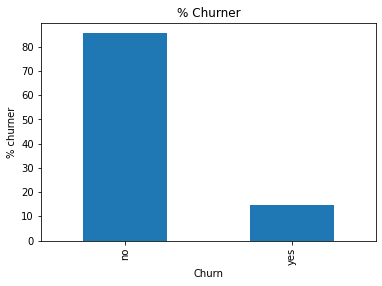

In [5]:
pd01 = telco['Churn'].value_counts(normalize=True)*100
pd01.plot.bar()
plt.title('% Churner')
plt.xlabel('Churn')
plt.ylabel('% churner')
plt.show()

In [6]:
# Group telco by 'Churn' and compute the mean
telco.groupby('Churn').mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


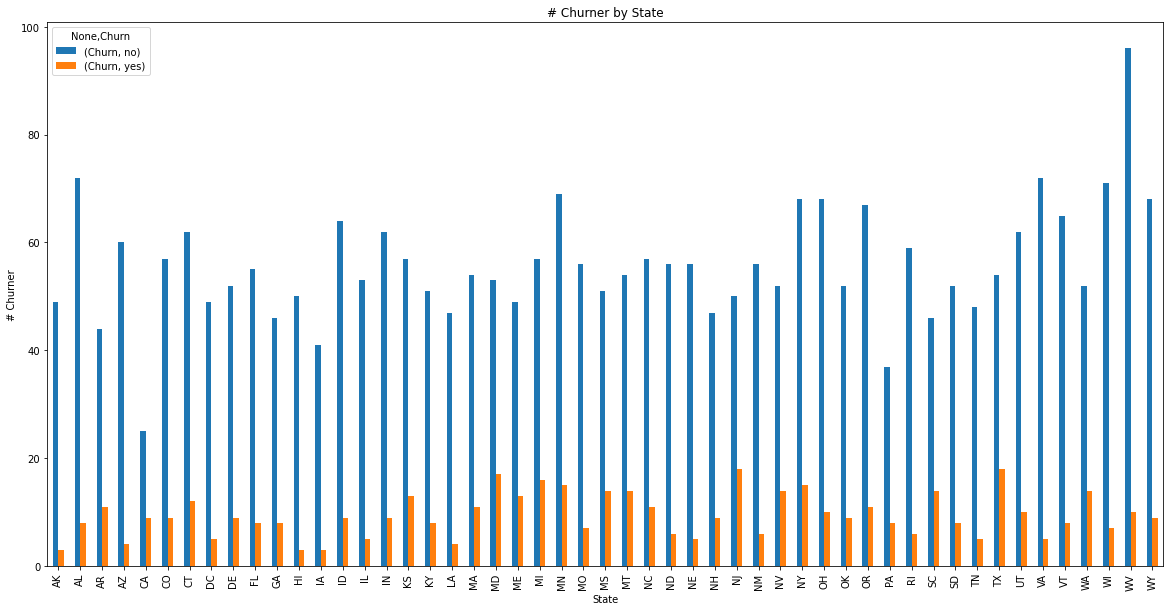

In [7]:
# Count the number of churners and non-churners by State
pd01 = pd.DataFrame(telco.groupby('State')['Churn'].value_counts())\
    .unstack(level=1)
pd01.plot.bar(figsize=(20, 10))
plt.title('# Churner by State')
plt.xlabel('State')
plt.ylabel('# Churner')
plt.show()

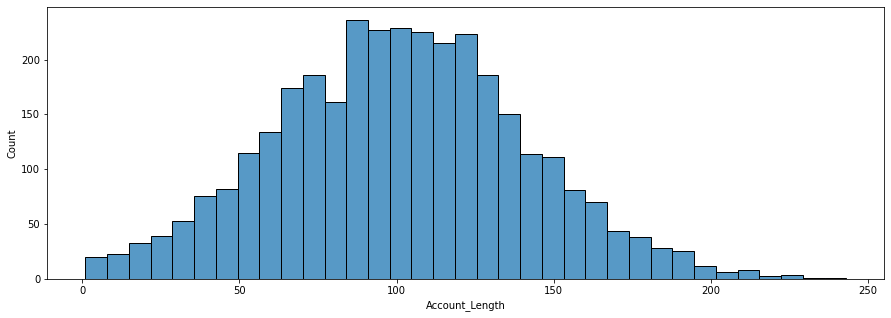

In [8]:
# Visualizing the distribution of account lengths
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.histplot(telco['Account_Length'])
plt.show()

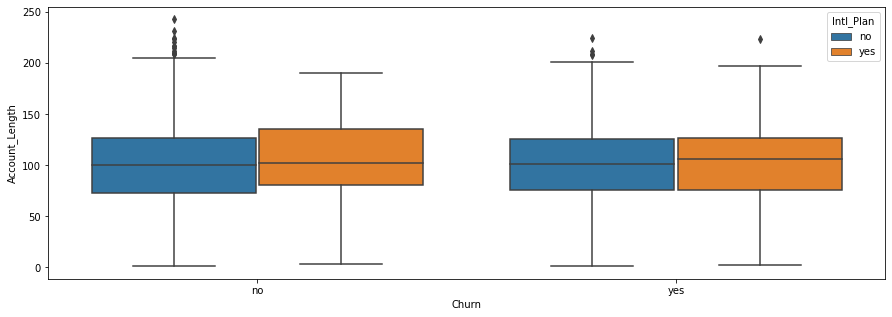

In [9]:
# Differences in account length
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(data=telco, x='Churn', y='Account_Length', 
    hue='Intl_Plan')
plt.show()

# Feature engineering

In [10]:
# Dropping unnecessary features
telco = telco.drop(['Area_Code', 'Phone'], axis=1)

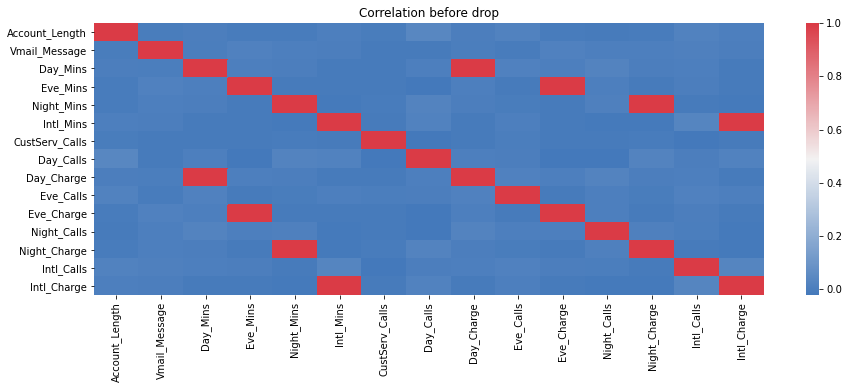

In [11]:
# Highly correlated features can be dropped
# calculate the correlation matrix
corr = telco.corr()
# plot the heatmap
# Add diverging colormap from red to blue
cmap = sns.diverging_palette(250, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.heatmap(corr, xticklabels=corr.columns, 
    yticklabels=corr.columns, cmap=cmap)
plt.title("Correlation before drop")
plt.show()

In [12]:
# Ratio between Minutes and Charge
telco['Day_Cost'] = telco['Day_Mins']/telco['Day_Charge']
telco['Eve_Cost'] = telco['Eve_Mins']/telco['Eve_Charge']
telco['Night_Cost'] = telco['Night_Mins']/telco['Night_Charge']
telco['Intl_Cost'] = telco['Intl_Mins']/telco['Intl_Charge']

# Average length of calls
telco['Avg_Day_Calls'] = telco['Day_Mins']/telco['Day_Calls']
telco['Avg_Eve_Calls'] = telco['Eve_Mins']/telco['Eve_Calls']
telco['Avg_Night_Calls'] = telco['Night_Mins']/telco['Night_Calls']
telco['Avg_Intl_Calls'] = telco['Intl_Mins']/telco['Intl_Calls']

In [13]:
# Dropping Highly correlated features
drop_var = ['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins',
    'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge',
    'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls']
telco = telco.drop(drop_var, axis=1)

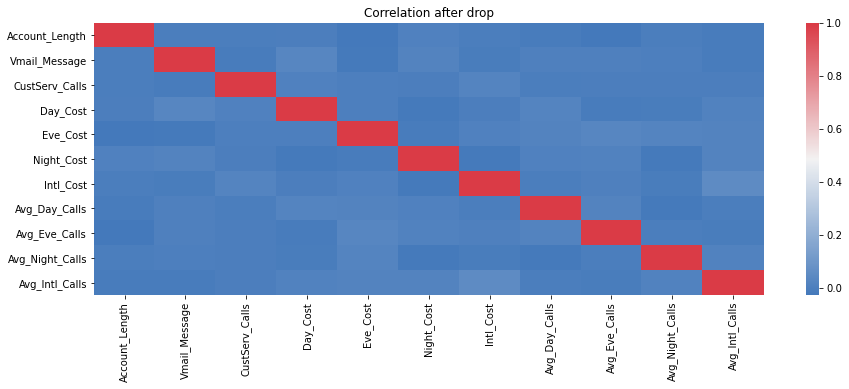

In [14]:
# calculate the correlation matrix
corr = telco.corr()
# plot the heatmap
# Add diverging colormap from red to blue
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.heatmap(corr, xticklabels=corr.columns, 
    yticklabels=corr.columns, cmap=cmap)
plt.title("Correlation after drop")
plt.show()

# Data preprocessing

In [15]:
# Data type
print(telco.dtypes)
telco.head()

Account_Length       int64
Vmail_Message        int64
CustServ_Calls       int64
Churn               object
Intl_Plan           object
Vmail_Plan          object
State               object
Day_Cost           float64
Eve_Cost           float64
Night_Cost         float64
Intl_Cost          float64
Avg_Day_Calls      float64
Avg_Eve_Calls      float64
Avg_Night_Calls    float64
Avg_Intl_Calls     float64
dtype: object


,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,State,Day_Cost,Eve_Cost,Night_Cost,Intl_Cost,Avg_Day_Calls,Avg_Eve_Calls,Avg_Night_Calls,Avg_Intl_Calls
0,128,25,1,no,no,yes,KS,5.881961,11.764005,22.225250,3.703704,2.410000,1.993939,2.689011,3.333333
1,107,26,1,no,no,yes,OH,5.882781,11.762936,22.218341,3.702703,1.313821,1.898058,2.469903,4.566667
2,137,0,0,no,no,no,NJ,5.882069,11.766990,22.213115,3.708207,2.135088,1.101818,1.563462,2.440000
3,84,0,2,no,yes,no,OH,5.882122,11.768061,22.223476,3.707865,4.216901,0.703409,2.212360,0.942857
4,75,0,3,no,yes,no,OK,5.882145,11.760508,22.223543,3.699634,1.475221,1.215574,1.544628,3.366667


In [16]:
# Encoding binary features
telco['Intl_Plan'] = LabelEncoder().fit_transform(telco['Intl_Plan'])
telco['Vmail_Plan'] = LabelEncoder().fit_transform(telco['Vmail_Plan'])
telco['Churn'] = LabelEncoder().fit_transform(telco['Churn'])

In [17]:
# Feature scaling
scale_var = ['Account_Length', 'Vmail_Message', 'CustServ_Calls',
    'Day_Cost', 'Eve_Cost', 'Night_Cost', 'Intl_Cost', 'Avg_Day_Calls',
    'Avg_Eve_Calls', 'Avg_Night_Calls', 'Avg_Intl_Calls']
telco[scale_var] = StandardScaler().fit_transform(telco[scale_var])

In [18]:
telco.describe()

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Cost,Eve_Cost,Night_Cost,Intl_Cost,Avg_Day_Calls,Avg_Eve_Calls,Avg_Night_Calls,Avg_Intl_Calls
count,3.333000e+03,3.333000e+03,3.333000e+03,3333.000000,3333.000000,3333.000000,3.331000e+03,3.332000e+03,3.333000e+03,3.315000e+03,3.331000e+03,3.332000e+03,3.333000e+03,3.315000e+03
mean,1.470971e-16,7.035077e-17,8.527366e-18,0.144914,0.096910,0.276628,-6.637719e-13,-8.783637e-14,1.721142e-14,7.516963e-15,-8.639142e-17,-1.066241e-17,-4.157091e-16,-1.393221e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,0.352067,0.295879,0.447398,1.000150e+00,1.000150e+00,1.000150e+00,1.000151e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000151e+00
min,-2.513172e+00,-5.917599e-01,-1.188218e+00,0.000000,0.000000,0.000000,-1.831840e+01,-4.486953e+00,-6.674367e+00,-8.046175e+00,-2.528604e+00,-2.362841e+00,-2.627713e+00,-1.281026e+00
25%,-6.797448e-01,-5.917599e-01,-4.279320e-01,0.000000,0.000000,0.000000,-4.874468e-01,-7.523006e-01,-7.438627e-01,-7.321345e-01,-6.737704e-01,-6.293129e-01,-6.812800e-01,-6.311395e-01
50%,-1.627644e-03,-5.917599e-01,-4.279320e-01,0.000000,0.000000,0.000000,-3.334096e-02,7.151973e-02,2.051332e-02,1.708335e-01,-1.116081e-01,-1.525904e-01,-1.214148e-01,-2.886061e-01
75%,6.513740e-01,8.695542e-01,3.323545e-01,0.000000,0.000000,1.000000,5.096071e-01,7.775875e-01,7.313191e-01,7.454494e-01,5.327141e-01,4.939792e-01,5.212164e-01,3.041915e-01
max,3.564766e+00,3.134591e+00,5.654360e+00,1.000000,1.000000,1.000000,2.797821e+01,3.993526e+00,1.047483e+01,5.741687e+00,7.315365e+00,1.741340e+01,7.093262e+00,6.674554e+00


In [19]:
# Data type
print(telco.dtypes)
telco.head()

Account_Length     float64
Vmail_Message      float64
CustServ_Calls     float64
Churn                int64
Intl_Plan            int64
Vmail_Plan           int64
State               object
Day_Cost           float64
Eve_Cost           float64
Night_Cost         float64
Intl_Cost          float64
Avg_Day_Calls      float64
Avg_Eve_Calls      float64
Avg_Night_Calls    float64
Avg_Intl_Calls     float64
dtype: object


,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,State,Day_Cost,Eve_Cost,Night_Cost,Intl_Cost,Avg_Day_Calls,Avg_Eve_Calls,Avg_Night_Calls,Avg_Intl_Calls
0,0.676489,1.234883,-0.427932,0,0,1,KS,-0.291551,-0.238174,0.390830,0.170833,0.734786,-0.141600,0.841837,0.097745
1,0.149065,1.307948,-0.427932,0,0,1,OH,0.562728,-0.710168,-0.454268,-0.051248,-0.763862,-0.265233,0.533006,0.643354
2,0.902529,-0.591760,-1.188218,0,0,0,NJ,-0.179805,1.080580,-1.093471,1.169862,0.358938,-1.291940,-0.744616,-0.297454
3,-0.428590,-0.591760,0.332354,0,1,0,OH,-0.124395,1.553457,0.173906,1.094093,3.205103,-1.805666,0.170001,-0.959769
4,-0.654629,-0.591760,1.092641,0,1,0,OK,-0.099834,-1.782958,0.182114,-0.732135,-0.543203,-1.145258,-0.771162,0.112491


In [23]:
ohe_df = pd.get_dummies(telco.State)
ohe_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# concat with data
pd.concat([telco, ohe_df], axis=1).drop(['State'], axis=1)

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Cost,Eve_Cost,Night_Cost,Intl_Cost,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.676489,1.234883,-0.427932,0,0,1,-0.291551,-0.238174,0.390830,0.170833,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,1.307948,-0.427932,0,0,1,0.562728,-0.710168,-0.454268,-0.051248,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,-0.591760,-1.188218,0,0,0,-0.179805,1.080580,-1.093471,1.169862,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,-0.591760,0.332354,0,1,0,-0.124395,1.553457,0.173906,1.094093,...,0,0,0,0,0,0,0,0,0,0
4,-0.654629,-0.591760,1.092641,0,1,0,-0.099834,-1.782958,0.182114,-0.732135,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,2.038605,0.332354,0,0,1,1.039932,-0.637631,-0.087692,1.094093,...,0,0,0,0,0,0,0,0,0,0
3329,-0.830437,-0.591760,1.092641,0,0,0,-0.351573,-0.326997,-0.453027,0.805351,...,0,0,0,0,0,0,0,0,1,0
3330,-1.835055,-0.591760,0.332354,0,0,0,-0.681151,-0.351833,-1.395175,-0.476175,...,0,0,0,0,0,0,0,0,0,0
3331,2.082955,-0.591760,0.332354,0,1,0,-0.558054,-1.460288,1.757332,0.170833,...,0,0,0,0,0,0,0,0,0,0


In [ ]:


# Perform one hot encoding on 'State' 
telco_state = pd.get_dummies(telco['State'])

# Standardization
scale_var = ['Intl_Calls', 'Night_Mins']
telco_scaled = StandardScaler().fit_transform(telco[scale_var])
telco_scaled = pd.DataFrame(telco_scaled, columns=scale_var)